In the test.csv , we don’t have the SalePrice. I can't find the out sample error.


In [19]:
import numpy as np # linear algebra
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import os



def gradient_descent(x, y):
    N = y.size  # No. of data points

    learning_rate = 0.01  # Step size
    iterations = 2000  # No. of iterations
    epsilon = 0.0001

    np.random.seed(123)
    w = np.random.rand(2)
    all_avg_err = []
    all_w = [w]

    for i in range(iterations):
        ## forward pass
        prediction = np.dot(x, w)
        errors = prediction - y
        avg_err = 1/N * np.dot(errors.T, errors)
        all_avg_err.append(avg_err)

        ## update w     (y^bar -(wT x + b))^2  --> 2(y^bar - (Wt)...)
        w = w - learning_rate * (2/N) * np.dot(x.T, errors)
        all_w.append(w)

    return all_w, all_avg_err

def show_err(all_avg_err):
    plt.title('Errors')
    plt.xlabel('No. of iterations')
    plt.ylabel('Err')
    plt.plot(all_avg_err)
    plt.show()
    print('in sample err : ' )
    print(all_avg_err[-1])

def show_w(x, y, all_w, all_avg_err):
    # Set the plot up,
    fig = plt.figure()
    ax = plt.axes()
    plt.title('Sale Price vs Living Area')
    plt.xlabel('Living Area in square feet (normalised)')
    plt.ylabel('Sale Price ($)')
    plt.scatter(x[:, 1], y, color='red')
    line, = ax.plot([], [], lw=2)
    annotation = ax.text(-1, 700000, '')
    annotation.set_animated(True)
    plt.close()

    def init():
        line.set_data([], [])
        annotation.set_text('')
        return line, annotation

    # animation function.  This is called sequentially
    def animate(i):
        x = np.linspace(-5, 20, 1000)
        y = all_w[i][1] * x + all_w[i][0]
        line.set_data(x, y)
        annotation.set_text('err = %.2f e10' % (all_avg_err[i] / 10000000000))
        return line, annotation

    anim = animation.FuncAnimation(fig, animate, init_func=init, frames=300, interval=0, blit=True)
    anim.save('./L02_LinearReg/animation.gif', writer='imagemagick', fps=30)
    print('./L02_LinearReg/animation saved!')


def demo():
    x, y = load_data()

    all_w, all_avg_err = gradient_descent(x, y)

    w = all_w[-1]
    print("Estimated w1, w2: {:.2f}, {:.2f}".format(w[0], w[1]))

    show_err(all_avg_err)
    show_w(x, y, all_w, all_avg_err)


+++++++++++++++++++++++++++

model : y = wx + b

model : y = wx + b 
Estimated w1, w2: 180921.20, 56294.90


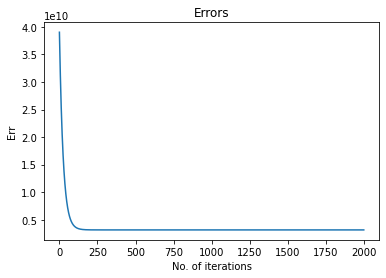

in sample err : 
3139843209.6665273


In [23]:
print("model : y = wx + b ")


def load_data(path):
    #cwd = os.getcwd()
    #print(cwd)

    data = pd.read_csv(path)

    x = data['GrLivArea']
    y = data['SalePrice']

    #pre-processing
    x = (x - x.mean()) / x.std()   ## Nx1
    x = np.c_[np.ones(x.shape[0]), x]  ##  Nx2

    return x, y




#training

x, y = load_data('train.csv')

all_w, all_avg_err = gradient_descent(x, y)

w = all_w[-1]
print("Estimated w1, w2: {:.2f}, {:.2f}".format(w[0], w[1]))

show_err(all_avg_err)
#show_w(x, y, all_w, all_avg_err)




#testing
#x, y = load_data('test.csv')
#y_predict = np.dot(x, w)
#MSE = np.square(np.subtract(y,y_predict)).mean()
#MSE



+++++++++++++++++++++++++++

model : y = w*log10(x) + b 

model : y = w*log(x) + b 
Estimated w1, w2: 180921.20, 55221.92


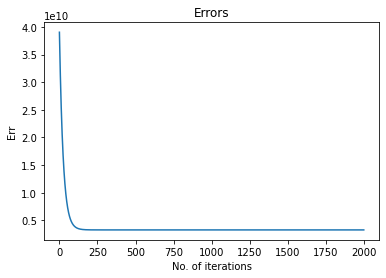

MovieWriter imagemagick unavailable; using Pillow instead.


in sample err : 
3259416903.252769
./L02_LinearReg/animation saved!


In [25]:
print("model : y = w*log(x) + b ")


def load_data(path):
    #cwd = os.getcwd()
    #print(cwd)

    data = pd.read_csv(path)

    x = data['GrLivArea']
    y = data['SalePrice']

    #pre-processing
    
    x = np.log10(x)
    x = (x - x.mean()) / x.std()   ## Nx1
    x = np.c_[np.ones(x.shape[0]), x]  ##  Nx2

    return x, y




#training

x, y = load_data('train.csv')

all_w, all_avg_err = gradient_descent(x, y)

w = all_w[-1]
print("Estimated w1, w2: {:.2f}, {:.2f}".format(w[0], w[1]))

show_err(all_avg_err)
#show_w(x, y, all_w, all_avg_err)




#testing
#x, y = load_data('test.csv')
#y_predict = np.dot(x, w)
#MSE = np.square(np.subtract(y,y_predict)).mean()
#MSE


+++++++++++++++++++++++++++

model : y = wx^2+ b 

model : y = wx^2 + b  
Estimated w1, w2: 180921.20, 51817.70


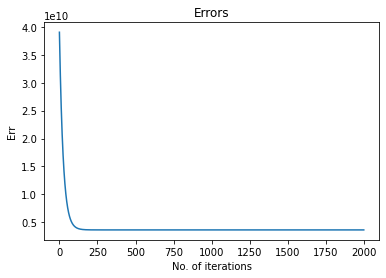

in sample err : 
3623553777.5476136


In [28]:
print("model : y = wx^2 + b  ")


def load_data(path):
    #cwd = os.getcwd()
    #print(cwd)

    data = pd.read_csv(path)

    x = data['GrLivArea']
    y = data['SalePrice']

    #pre-processing
    
    x = np.power(x,2)
    
    x = (x - x.mean()) / x.std()   ## Nx1
    x = np.c_[np.ones(x.shape[0]), x]  ##  Nx2

    return x, y




#training

x, y = load_data('train.csv')

all_w, all_avg_err = gradient_descent(x, y)

w = all_w[-1]
print("Estimated w1, w2: {:.2f}, {:.2f}".format(w[0], w[1]))

show_err(all_avg_err)
#show_w(x, y, all_w, all_avg_err)




#testing
#x, y = load_data('test.csv')
#y_predict = np.dot(x, w)
#MSE = np.square(np.subtract(y,y_predict)).mean()
#MSE
